In [29]:
import numpy as np
import matplotlib.pyplot as plt

***
### Código de ref.:

In [30]:
import numpy as np

N = 10       # Numero de intervalos no dominio
k_final = 10  # Numero de passos de tempo
L = 1.0      # Tamanho da barra
delta_x = L/N # delta x

# Existe uma restricao para o delta_t, dado um delta_x. O delta_t tem que ser menor
# do que delta_x ∗ delta x/2. Por isso, vamos definir um delta_t que obedeca a essa
# restricao. No seu trabalho voce vai ver o que acontece quando essa restricao
# nao eh obedecida.

delta_t = 0.2 * pow(delta_x, 2)

# Vamos definir o vetor temperatura como sendo formado por zeros, com N + 1 pontos.

Temp = np.zeros(N + 1, float)

# No entanto, o ponto da extremidade direita, que eh o N, tem valor 1.

Temp[N] = 1.0
print('Temperatura em t = 0: ', Temp)
Temp_nova = np.copy(Temp)

# Veja que agora os limites dos loops estao em funcao de k_final e N.

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + ( delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
        Temp = np.copy(Temp_nova)

# Vamos escrever apenas o resultado final.

print('Temperatura em t = ', k*delta_t ,' : ', Temp)

Temperatura em t = 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Temperatura em t =  0.020000000000000004  :  [0.00000000e+00 3.44064000e-06 5.39361280e-05 5.14398618e-04
 3.36162456e-03 1.59930450e-02 5.75386766e-02 1.60952226e-01
 3.58655782e-01 6.52967417e-01 1.00000000e+00]


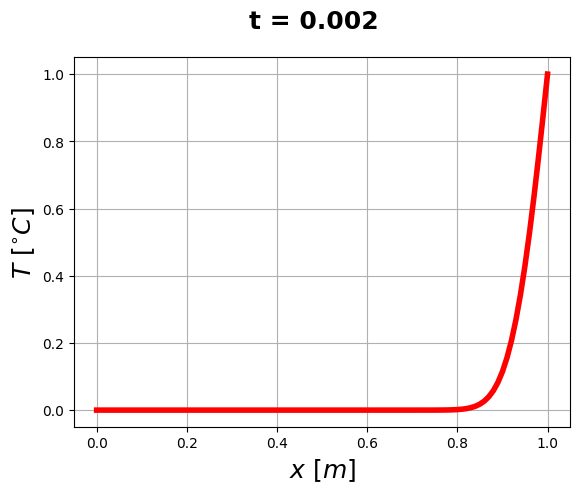

In [31]:
## Codigo do professor
import numpy as np
import matplotlib.pyplot as plt

N = 100
k_final = 100
L = 1.0

x = np.linspace(0.0, L, N + 1) # Vetor x, usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x

Temp = np.zeros(N + 1, float)
Temp[N] = 1.0
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')

graphic_ex = fig.add_subplot()
graphic_ex.grid(True)

graphic_ex.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
graphic_ex.set_xlabel('$x$ $[m]$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura-ex.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()

***
### Proposta.:
Apresente a solução de cada problema em diferentes instantes de tempo (escolha pelo menos 4 instantes de tempo para cada caso: um no começo, dois intermediários e um representando o regime permanente, ou seja, para t grande). Comente o que acontece com o perfil de temperatura quando t→ ∞. É o esperado? Compare a solução em cada tempo com a solução analítica. Resolva com diferentes valores de Delta_x e compare os resultados. Em todos os problemas deve ser analisada também a dependência da solução com o tamanho do Delta_x e do Delta_t escolhidos. Atenção: devemos ter sempre Delta_t"<"Delta_x²/2. O que acontece quando essa condição não é obedecida? Faça alguns testes. Investigue também qual é a influência de alpha na solução. Os códigos desenvolvidos devem ser enviados separadamente.:

***
### Resolução Aproximada - Problema 1:

> Condições de contorno:
> - $T(0,t) = 0$
> - $T(L,t) = 0\\$
>   para $t\ge 0$
> - $T(x,0) = 1\\$
>   para $0 < x < L$

Delta_t: 2e-05
Temperatura para k =  100 : [0.         0.12529723 0.24752728 0.36384602 0.47182868 0.56961701
 0.65600302 0.73044479 0.79301951 0.844327   0.88536173 0.91737275
 0.94172902 0.9598037  0.97288536 0.98211892 0.98847472 0.99274097
 0.99553334 0.99731542 0.99842429 0.99909697 0.99949479 0.99972412
 0.99985299 0.99992356 0.99996123 0.99998082 0.99999074 0.99999564
 0.999998   0.99999911 0.99999961 0.99999983 0.99999993 0.99999997
 0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99999999 0.99999997
 0.99999993 0.99999983 0.99999961 0.99999911 0.999998   0.99999564
 0.99999074 0.99998082 0.99996123 0.99992356 0.99985299 0.99972412
 0.99949479 0.99909697 0.99842429 0.99731542 0.99553334 0.99274097
 0.98847472 0.98211892 0.97288536 0.9598037  0.9417

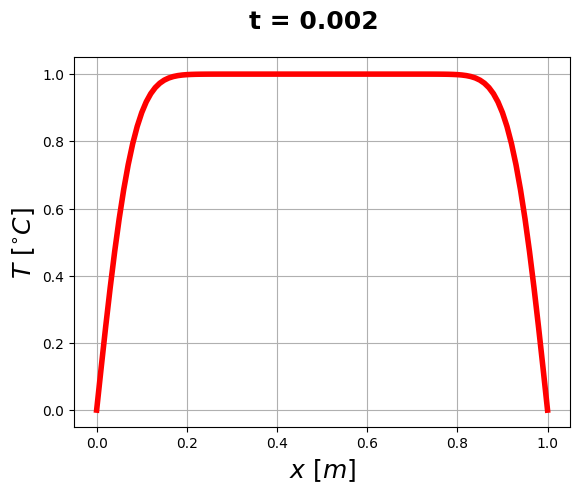

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
k_final = 100
L = 1

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x
print("Delta_t:", delta_t)

#Temperatura para o instante inicial
Temp = np.ones(N + 1, float)    # T(x,0) = 1
Temp[0] = 0                     # T(0,t) = 0
Temp[N] = 0                     # T(L,t) = 0
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

print('Temperatura para k = ', k, ':', Temp)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')

graphic_1 = fig.add_subplot()
graphic_1.grid(True)

graphic_1.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
graphic_1.set_xlabel('$x$ $[m]$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura-1.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()

***
### Resolução Aproximada - Problema 2:

> Condições de contorno:
> - $T(0,t) = 1$
> - $T(L,t) = 0\\$
>   para $t\ge 0$
> - $T(x,0) = 0\\$
>   para $0 < x < L$

Delta_t: 2e-05
Temperatura para k =  100 : [1.00000000e+00 8.74702771e-01 7.52472724e-01 6.36153980e-01
 5.28171319e-01 4.30382992e-01 3.43996978e-01 2.69555206e-01
 2.06980488e-01 1.55673000e-01 1.14638267e-01 8.26272532e-02
 5.82709848e-02 4.01963027e-02 2.71146445e-02 1.78810824e-02
 1.15252756e-02 7.25902825e-03 4.46665969e-03 2.68458234e-03
 1.57571009e-03 9.03027881e-04 5.05211809e-04 2.75878405e-04
 1.47014394e-04 7.64411545e-05 3.87746559e-05 1.91845036e-05
 9.25686127e-06 4.35527906e-06 1.99772281e-06 8.93199889e-07
 3.89208590e-07 1.65257556e-07 6.83610407e-08 2.75451996e-08
 1.08091754e-08 4.13014967e-09 1.53631516e-09 5.56221962e-10
 1.95964891e-10 6.71701870e-11 2.23947067e-11 7.26078231e-12
 2.28868165e-12 7.01199779e-13 2.08755784e-13 6.03749451e-14
 1.69579145e-14 4.62440738e-15 1.22397437e-15 3.14325471e-16
 7.82942042e-17 1.89089383e-17 4.42618247e-18 1.00379542e-18
 2.20462795e-19 4.68717177e-20 9.64213672e-21 1.91828609e-21
 3.68901662e-22 6.85381305e-23 1.22951103e

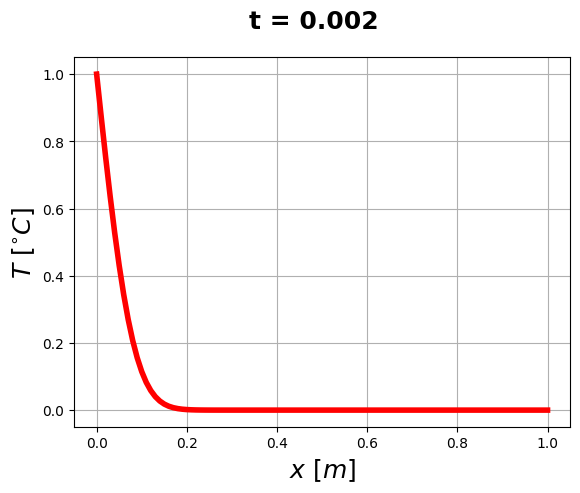

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
k_final = 100
L = 1

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x
print("Delta_t:", delta_t)

#Temperatura para o instante inicial
Temp = np.zeros(N + 1, float)    # T(x,0) = 0 e T(L,t) = 0
Temp[0] = 1                     # T(0,t) = 1
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

print('Temperatura para k = ', k, ':', Temp)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')

graphic_2 = fig.add_subplot()
graphic_2.grid(True)

graphic_2.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
graphic_2.set_xlabel('$x$ $[m]$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura-2.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()

***
### Resolução Aproximada - Problema 3:

> Condições de contorno:
> - $T(0,t) = 0$
> - $T(L,t) = 0\\$
>   para $t \ge 0$
> - $T(x,0) = sin(\frac{\pi\cdot x}{2})\\$
>   para $0 < x < L$

Delta_t: 8e-05
Temperatura para k =  100 : [0.         0.0307968  0.06156322 0.09226887 0.12288347 0.1533768
 0.18371876 0.21387942 0.243829   0.27353795 0.30297695 0.33211695
 0.3609292  0.38938524 0.41745702 0.44511681 0.47233732 0.4990917
 0.52535353 0.5510969  0.57629641 0.60092718 0.62496491 0.64838587
 0.67116696 0.69328568 0.71472022 0.73544941 0.7554528  0.77471065
 0.79320396 0.81091447 0.8278247  0.84391798 0.8591784  0.87359092
 0.88714132 0.89981621 0.91160309 0.92249033 0.93246718 0.9415238
 0.94965125 0.95684151 0.96308748 0.968383   0.97272284 0.97610273
 0.97851931 0.97997022 0.98045402 0.97997022 0.97851931 0.97610273
 0.97272284 0.968383   0.96308748 0.95684151 0.94965125 0.9415238
 0.93246718 0.92249033 0.91160309 0.89981621 0.88714132 0.87359092
 0.8591784  0.84391798 0.8278247  0.81091447 0.79320396 0.77471065
 0.7554528  0.73544941 0.71472022 0.69328568 0.67116696 0.64838587
 0.62496491 0.60092718 0.57629641 0.5510969  0.52535353 0.4990917
 0.47233732 0.44511681 0

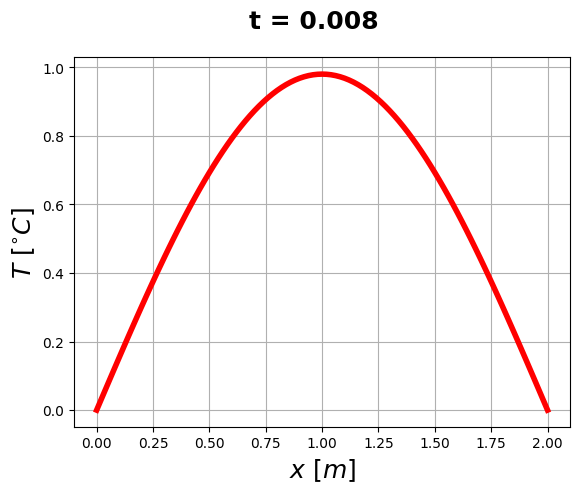

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 100
k_final = 100
L = 2

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x
print("Delta_t:", delta_t)

#Temperatura para o instante inicial
Temp = np.zeros(N + 1, float)
for space in range(N):
    Temp[space] = math.sin(math.pi*space*delta_x/2)   # T(0,t)=T(L,t)=0 e T(x,0) = sin(pi*x/2)
    
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

print('Temperatura para k = ', k, ':', Temp)

t = k * delta_t # Tempo atual, usado no título do gráfico

fig = plt.figure()
fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')

graphic_3 = fig.add_subplot()
graphic_3.grid(True)

graphic_3.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
graphic_3.set_xlabel('$x$ $[m]$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura-3.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()